## This code summarizes exploratory test using the paretoset library to identify efficient stock selections based on returns and volatility. The main goal was to test the feasibility of applying Pareto optimality in optimizing stock portfolios. Our preliminary findings indicate that the Pareto set can effectively highlight stocks offering a favorable balance between risk and return. Please consider this as an initial step in our broader research, requiring further analysis and validation.

In [22]:
import yfinance as yf
import pandas as pd
from paretoset import paretoset
import matplotlib.pyplot as plt

In [23]:
# Define the stocks and date of interest
symbols = [
    'AAPL', 'MSFT', 'NVDA', 'ADBE', 'INTC',  # Technology
    'JPM', 'GS', 'AXP', 'MS', 'V',           # Financials
    'JNJ', 'PFE', 'UNH', 'MRK', 'ABBV',      # Health Care
    'AMZN', 'TSLA', 'HD', 'NKE', 'MCD',      # Consumer Discretionary
    'PG', 'KO', 'PEP', 'WMT', 'COST',        # Consumer Staples
    'XOM', 'CVX', 'COP', 'SLB', 'KMI',       # Energy
    'BA', 'MMM', 'HON', 'CAT', 'LMT',        # Industrials
    'NEE', 'DUK', 'SO', 'D', 'EXC',          # Utilities
    'AMT', 'CCI', 'PLD', 'EQIX', 'PSA',      # Real Estate
    'VZ', 'T', 'TMUS'                        # Telecommunication Services
]

# Random input date, here we can set any date of interest
input_date = "2021-01-01"

In [24]:
# Fetch historical data up to the input date
data = yf.download(symbols, start="2020-01-01", end=input_date)['Adj Close']

data.head()

[*********************100%%**********************]  48 of 48 completed


,AAPL,ABBV,ADBE,AMT,AMZN,AXP,BA,CAT,CCI,COP,...,SLB,SO,T,TMUS,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,73.152657,74.906532,334.429993,207.221436,94.900497,118.922516,331.348572,137.044830,121.596169,55.905155,...,36.884796,53.221230,21.309374,78.248413,28.684000,276.030243,185.897507,49.421555,111.670395,57.528839
2020-01-03,72.441467,74.195549,331.809998,207.321136,93.748497,117.741318,330.791901,135.142059,122.265572,56.110130,...,37.242897,53.170250,21.419046,77.830246,29.534000,273.236847,184.418991,48.895370,110.684563,57.066334
2020-01-06,73.018692,74.781082,333.709991,207.266739,95.143997,117.231049,331.766083,135.051010,121.235703,56.776295,...,37.481644,53.382717,21.440985,78.278290,30.102667,275.133728,184.020218,48.790131,110.459229,57.504486
2020-01-07,72.675285,74.354462,333.390015,202.850235,95.343002,116.616829,335.285156,133.266617,119.184502,56.776295,...,37.288818,53.221230,21.523235,78.576981,31.270666,273.472809,183.533920,48.247749,109.435860,57.033875
2020-01-08,73.844353,74.881439,337.869995,204.609604,94.598503,118.629585,329.410095,134.450119,119.682274,55.461075,...,36.186951,53.204239,21.589037,79.074806,32.809334,279.238800,186.675644,48.336800,109.060280,56.173779


In [25]:
# Calculate daily returns and volatility
returns = data.pct_change().dropna()
mean_returns = returns.mean()
volatility = returns.std()

# Construct a decision matrix
metrics = pd.DataFrame(index=symbols)
metrics['Return'] = mean_returns
metrics['Volatility'] = volatility

metrics

,Return,Volatility
AAPL,0.002728,0.029418
MSFT,0.001717,0.027679
NVDA,0.003765,0.036481
ADBE,0.002052,0.030232
INTC,-0.000123,0.033674
JPM,0.000309,0.034296
GS,0.001103,0.032940
AXP,0.000692,0.040482
MS,0.001858,0.036232
V,0.000920,0.026924


In [26]:
# Apply the paretoset library
mask = paretoset(metrics, sense=["max", "min"])
pareto_optimal_stocks = metrics[mask]

# Print out the Pareto optimal stocks
print("Pareto optimal stocks based on return and volatility:")
pareto_optimal_stocks

Pareto optimal stocks based on return and volatility:


,Return,Volatility
AAPL,0.002728,0.029418
NVDA,0.003765,0.036481
AMZN,0.002437,0.024260
TSLA,0.009973,0.056355
COST,0.001322,0.018384
VZ,0.000136,0.015492
TMUS,0.002473,0.025712


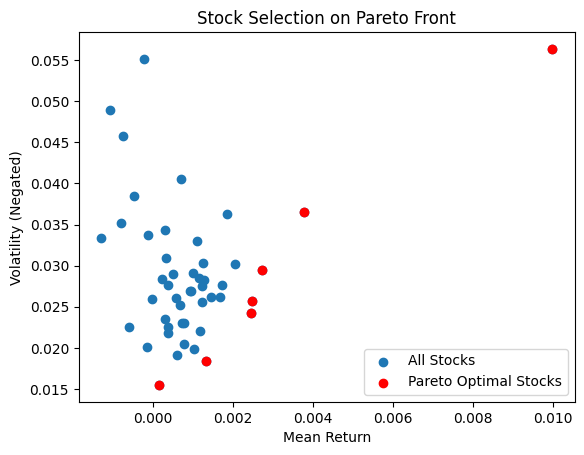

In [27]:
# Plotting all stocks
plt.scatter(metrics['Return'], metrics['Volatility'], label='All Stocks')

# Highlighting Pareto optimal stocks
plt.scatter(pareto_optimal_stocks['Return'], pareto_optimal_stocks['Volatility'], color='r', label='Pareto Optimal Stocks')

plt.title('Stock Selection on Pareto Front')
plt.xlabel('Mean Return')
plt.ylabel('Volatility (Negated)')
plt.legend()
plt.show()